In [81]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns

In [82]:
df = pd.read_csv("KNNAlgorithmDataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [83]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [84]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [85]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [86]:
print(df)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [87]:
encoder = LabelEncoder()
print(df['diagnosis'].unique())
df['diagnosis']= encoder.fit_transform(df['diagnosis'])
print(df['diagnosis'])

['M' 'B']
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


In [88]:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,train_size=0.8,random_state=42,stratify=Y)

In [95]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

print(classification_report(Y_test,Y_pred))

0.9385964912280702
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [90]:
k_vals = [i for i in range(1,40)]
scores = []
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model,scalar.fit_transform(X),Y,cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

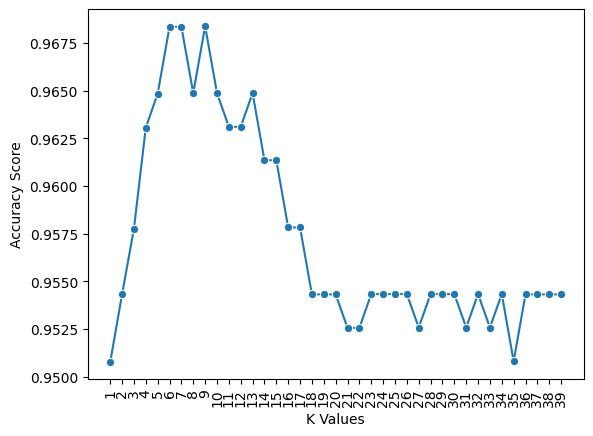

In [91]:
sns.lineplot(x = k_vals, y = scores, marker = 'o')
import matplotlib.pyplot as plt
plt.xlabel("K Values")
plt.xticks(k_vals,rotation=90)

plt.ylabel("Accuracy Score")

In [92]:
best = np.argmax(scores)
print(scores[best])
print(k_vals[best])

0.968390001552554
9


In [94]:
new_model = KNeighborsClassifier(n_neighbors=k_vals[best])
new_model.fit(X_train, Y_train)
y_pred1 = new_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred1)
print(accuracy)
print(classification_report(Y_test,y_pred1))

0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

